## Proyecto III: Visualización de datos
## Yuniel Antonio Villalón Rosales
##### Primera Parte: Análisis de Datos 


In [214]:

import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


### a.  Vaciar los datos del fichero barca.csv en un dataframe. Debe mostrar los encabezados de los datos y describir la cantidad de alojamientos disponibles.

In [295]:
df = pd.read_csv("data/barca.csv")
df

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Eixample,27,4.5,10,1.0,264.0,41.391617,2.162516
1,Shared room,Sants-Montjuïc,13,4.0,12,1.0,129.0,41.373268,2.170138
2,Shared room,Sants-Montjuïc,11,4.0,12,1.0,129.0,41.372360,2.169215
3,Shared room,Eixample,9,5.0,2,1.0,72.0,41.391836,2.154014
4,Shared room,Eixample,10,5.0,2,1.0,64.0,41.387623,2.148761
...,...,...,...,...,...,...,...,...,...
12628,Private room,Eixample,5,4.5,1,1.0,21.0,41.401955,2.179347
12629,Private room,Gràcia,35,4.5,1,1.0,24.0,41.406084,2.153433
12630,Private room,Gràcia,9,4.5,1,1.0,24.0,41.405000,2.159139
12631,Private room,Eixample,4,5.0,2,1.0,34.0,41.394932,2.154505


### b. Mostrar la información del dataset, debe realizar una breve descripción de los datos nombre, tipo de datos y si existen valores nulos, cantidad de atributos numéricos y categóricos (objectos o texto)

In [216]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12633 entries, 0 to 12632
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             12633 non-null  object 
 1   neighborhood          12633 non-null  object 
 2   reviews               12633 non-null  int64  
 3   overall_satisfaction  12633 non-null  float64
 4   accommodates          12633 non-null  int64  
 5   bedrooms              12633 non-null  float64
 6   price                 12633 non-null  float64
 7   latitude              12633 non-null  float64
 8   longitude             12633 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 888.4+ KB


In [217]:
descrip = df.describe()
descrip

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,12633.000000,12633.000000,12633.000000,12633.000000,12633.000000,12633.000000,12633.000000
mean,36.560754,4.560239,3.384707,1.535661,101.214913,41.392161,2.167727
std,43.818590,0.410359,2.220763,0.964957,99.205871,0.014901,0.017873
min,3.000000,1.000000,1.000000,0.000000,10.000000,41.351784,2.088379
25%,8.000000,4.500000,2.000000,1.000000,46.000000,41.380395,2.157068
50%,19.000000,4.500000,2.000000,1.000000,75.000000,41.389284,2.168013
75%,48.000000,5.000000,4.000000,2.000000,122.000000,41.402439,2.178273
max,457.000000,5.000000,16.000000,10.000000,3606.000000,41.465618,2.227329


### c. Mostrar los datos estadísticos del dataset, describa los resultados obtenidos para Price.

In [218]:
descrip["price"]

count    12633.000000
mean       101.214913
std         99.205871
min         10.000000
25%         46.000000
50%         75.000000
75%        122.000000
max       3606.000000
Name: price, dtype: float64

### d. Mostrar la cantidad de alojamientos que existe para cada tipo de alojamiento (room_type) cantidad y porcentaje.

In [219]:
cant = df["room_type"].value_counts()
c_p = pd.DataFrame(cant)
c_p["percentage"] = (c_p["room_type"]/len(df)*100).round(2)
c_p

,room_type,percentage
Private room,6526,51.66
Entire home/apt,6024,47.68
Shared room,83,0.66


### e. Mostrar un gráfico % alojamientos que existe para cada tipo de alojamiento (room_type)

Text(0.5, 1.0, 'Porcentaje por tipos de alojamientos.')

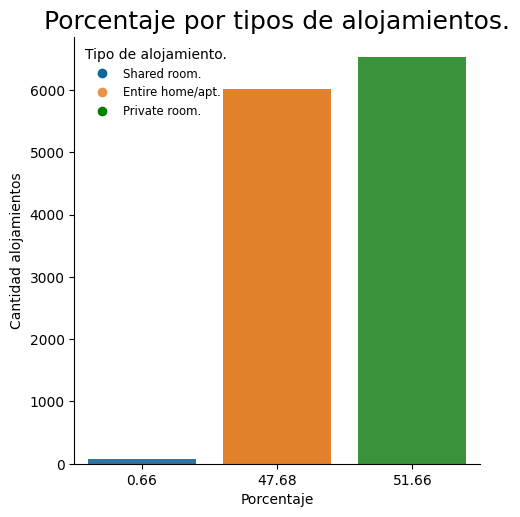

In [288]:
ax = sb.catplot(x = "percentage", y="room_type", data=c_p, kind="bar")
a = Line2D([], [], marker='o', linestyle='', markersize=6, color='#0a689e',  label='Shared room.')
b = Line2D([], [], marker='o', linestyle='', markersize=6, color='#ed9144', label='Entire home/apt.')
c = Line2D([], [], marker='o', linestyle='', markersize=6, color='green', label='Private room.')
plt.legend(
    handles=[a, b, c],
    title='Tipo de alojamiento.',
    loc='best',
    fontsize='small',
    frameon=False
    )

ax.set (xlabel = 'Porcentaje',
        ylabel = 'Cantidad alojamientos')
plt.title("Porcentaje por tipos de alojamientos.", size=18)

### f.  Mostrar un gráfico de dispersión del atributo precio.

Text(0.5, 1.0, 'Precios')

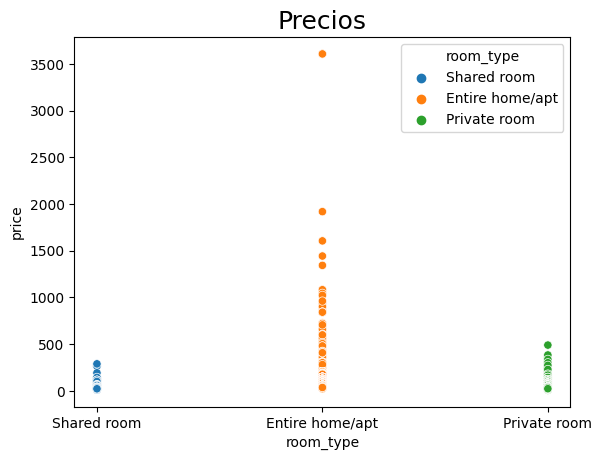

In [301]:
# sb.catplot(x="price",data=df, hue="room_type",kind="strip", alpha=0.4, aspect=2)
sb.scatterplot(data=df, x="room_type", y="price", hue="room_type")
plt.title("Precios", size=18)

### g.  Mostrar un gráfico de caja (boxplot) para precio, habilite la opción para visualizar los datos atípicos. 

Text(0.5, 1.0, 'Gráfico de caja (boxplot) para precio')

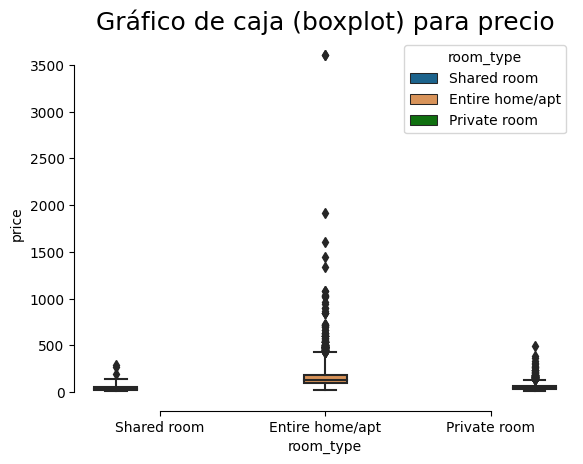

In [351]:
sb.boxplot(x="room_type", y="price", hue="room_type", palette=['#0a689e', '#ed9144', 'green'], data=df,  whis=3, saturation=0.75)
sb.despine(offset=2, trim=True)
plt.title("Gráfico de caja (boxplot) para precio", size=18)

### h.  Mostrar la cantidad de alojamientos por barrio "neighborhood"